# Predict Age Of Abalone - [Dataset Link](https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqa3lwRmVnaE9UOHpCbEE4d0V5WjJvekg3SHJQZ3xBQ3Jtc0tsUENnUFpjazRwa1U0ZURfT1ZpMlkteklfaVpXU1dvQlk0VUh5YW4yc091M0cyMVE1OG1rM2tCWEs1ZmJmSTdiUjUtam9YWWx3Qmd1V3pXVTctOEdmNG05STJDWjdIUGhIbzZTcUdXNVNwMHdPSjlYdw&q=http%3A%2F%2Farchive.ics.uci.edu%2Fml%2Fdatasets%2FAbalone) 

<img src=https://m.media-amazon.com/images/I/71nh7RVRYcL._AC_SL1000_.jpg width="200" align='left'>

## Dataset Information

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.  
  
8 attributes  
4177 instances  

`Sex`: nominal - M (male), F (female), I (infant)    
`Length`: continuous - longest shell measurement (in mm)    
`Diameter`: continuous - measurement perpendicular to legnth (in mm)    
`Height`: continuous - with meat in shell (in mm)  
`Whole weight`: continuous - the whole abalone (in grams)  
`Shucked weight`: continuous - weight of the meat (in grams)   
`Viscera weight`: continuous - gut weight after bleeding (in grams)  
`Shell weight`: continuous - after being dried (in grams)  
`Rings`: integer - +1.5 gives the age in years

## Problem Statement
Predict the age of the abalone on the basis of its physical features

## Solution

In [29]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from pandas_profiling import ProfileReport

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

import lightgbm as lgb

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [3]:
df_abalone = pd.read_csv('abalone.data', header = None, index_col = False) # reading the file
df_abalone.columns = ['sex', 'length', 
                      'diameter', 'height', 
                      'whole_weight', 'shucked_weight', 
                      'viscera_weight', 'shell_weight', 'rings'] # adding column names
df_abalone.head() # checking the contents

sex  length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell_weight  rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

### Exploratory Data Analysis

In [4]:
profile = ProfileReport(df_abalone) # generating profile report
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

[Text(0.5, 0, 'Length of Abalone (mm)'),
 Text(0, 0.5, 'Number of Rings'),
 Text(0.5, 1.0, 'Length vs Rings of Abalone')]

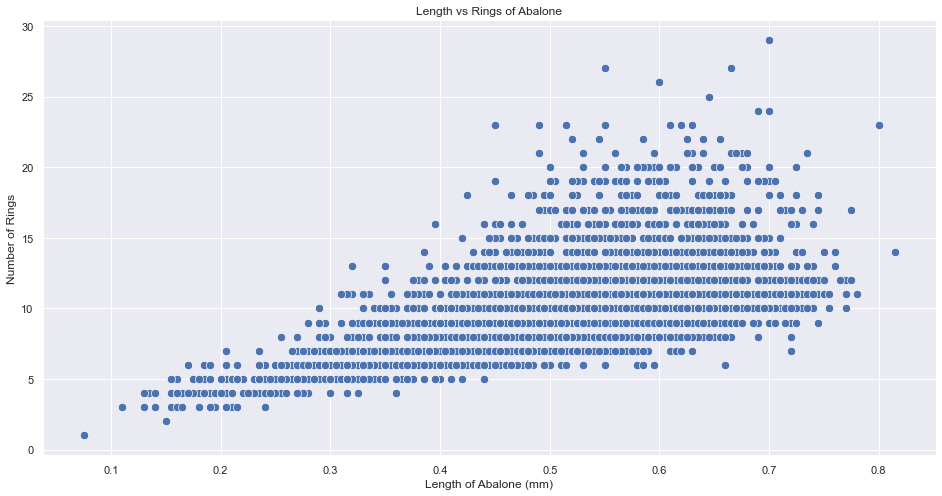

In [30]:
sns.set(rc={"figure.figsize": (16, 8)}) # setting figure size

# plotting length vs rings of abalone
plt_len_vs_rings = sns.scatterplot(data = df_abalone, x = 'length', y = 'rings', s = 70)
plt_len_vs_rings.set(xlabel = 'Length of Abalone (mm)',
                     ylabel = 'Number of Rings',
                     title = 'Length vs Rings of Abalone')

[Text(0.5, 0, 'Height of Abalone (mm)'),
 Text(0, 0.5, 'Number of Rings'),
 Text(0.5, 1.0, 'Height vs Rings of Abalone')]

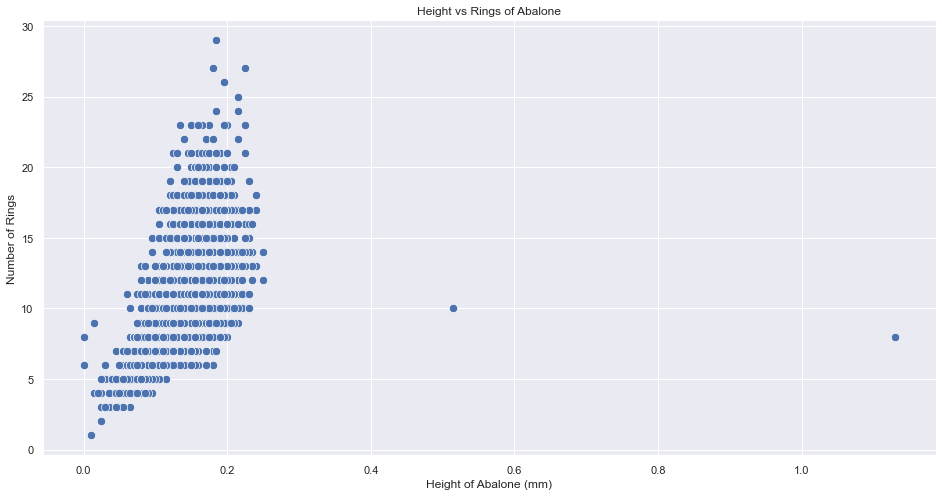

In [31]:
# plotting height vs rings of abalone
plt_height_vs_rings = sns.scatterplot(data = df_abalone, x = 'height', y = 'rings', s = 70)
plt_height_vs_rings.set(xlabel = 'Height of Abalone (mm)',
                        ylabel = 'Number of Rings',
                        title = 'Height vs Rings of Abalone')

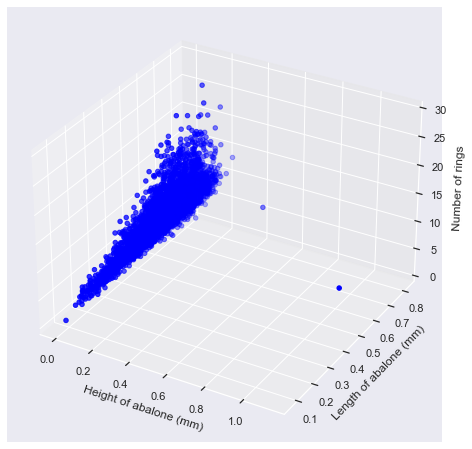

In [32]:
fig = plt.figure(figsize = (16,8)) # setting figure size
ax = plt.axes(projection = '3d') # setting projection to 3D to plot 3D graph

# plotting length vs height vs rings of abalone
ax.set_xlabel('Height of abalone (mm)')
ax.set_ylabel('Length of abalone (mm)')
ax.set_zlabel('Number of rings')
ax.scatter3D(df_abalone['height'], df_abalone['length'], df_abalone['rings'], c = 'blue')

plt.show()

### Encoding: One-hot encoding
#### Generating dummy variables

In [8]:
# generating dummy variables
encoded_data = pd.get_dummies(df_abalone)
encoded_data.head()

length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell_weight  rings  sex_F  sex_I  sex_M  
0         0.150     15      0      0      1  
1         0.070      7      0      0      1  
2         0.210      9      1      0      0  
3         0.155     10      0      0      1  
4         0.055      7      0      1      0

In [9]:
# checking the shape of dataset after adding dummy variables
print(encoded_data.shape)

(4177, 11)


### Modeling (Regression)
#### Splitting the dataset

In [10]:
# assigning first 4100 rows to training set
training_set = encoded_data.iloc[:4099, :]

# assigning the remaining rows to validation set
validation_set = encoded_data.iloc[4099:, :]

# checking the shape of training and validation set
print(validation_set.shape)
print(training_set.shape)

(78, 11)
(4099, 11)


#### Using Multiple Linear Regression

In [11]:
X = training_set[['length', 'height']] # using length and height as predictor variables for training set
y = training_set['rings'].values.reshape(-1, 1) # setting rings to response variable for training set

X_val = validation_set[['length', 'height']] # using length and height as predictor variables for validation set
y_val = validation_set['rings'].values.reshape(-1,1) # setting rings to response variable for validation set

# assigning train and test predictors and responses
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [12]:
lin_reg = LinearRegression() # creating Linear Regression object
lin_reg.fit(X_train, y_train) # fitting the model on train set

lin_reg_pred = lin_reg.predict(X_test) # testing the model, predicting the response on test data

# test set RMSE
test_rmse = mean_squared_error(y_test, lin_reg_pred, squared = False)
print(f'Test RMSE: {test_rmse}')

# validation set RMSE
lin_reg_pred_val = lin_reg.predict(X_val)
val_rmse = mean_squared_error(lin_reg_pred_val, y_val, squared = False)

print(f'Validation RMSE: {val_rmse}')

Test RMSE: 2.5679099174951547
Validation RMSE: 1.566178378231162


#### Using Multiple Linear Regression With Regularization (Ridge Regression)

In [13]:
ridge = Ridge() # creating Ridge object

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]} # list of parameters

ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_root_mean_squared_error', cv = 5) 

ridge_regressor.fit(X_train, y_train) # fitting the model

print(ridge_regressor.best_params_) # finding best parameter
print(-ridge_regressor.best_score_) # finding corresponding score

{'alpha': 1}
2.6564563658448885


In [14]:
ridge_reg = Ridge(alpha = 1) # creating Ridge object with parameter = 1
ridge_reg.fit(X_train, y_train) # fitting the model

ridge_reg_pred = ridge_reg.predict(X_test) # testing the model

# test RMSE
test_rmse = mean_squared_error(y_test, ridge_reg_pred, squared = False)
print(f'Test RMSE: {test_rmse}')

# validation RMSE
ridge_reg_pred_val = ridge_reg.predict(X_val)
val_rmse = mean_squared_error(y_val, ridge_reg_pred_val, squared = False)

print(f'Validation RMSE: {val_rmse}')

Test RMSE: 2.5871300097108296
Validation RMSE: 1.564081325301487


#### Using Multiple Linear Regression With Regularization (Lasso Regression)

In [15]:
lasso = Lasso(tol = 0.05) # creating Lasso object

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]} # list of parameters

lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)

lasso_regressor.fit(X_train, y_train) # fitting the model

print(lasso_regressor.best_params_) # finding best parameter
print(-lasso_regressor.best_score_) # finding corresponding score

{'alpha': 0.01}
7.130917624445475


In [16]:
lasso_reg = Lasso(alpha = 0.01) # creating Lasso object with parameter = 0.01
lasso_reg.fit(X_train, y_train) # fitting the model

lasso_reg_pred = lasso_reg.predict(X_test) # testing the model

# test RMSE
test_rmse = mean_squared_error(y_test, lasso_reg_pred, squared = False)
print(f'Test RMSE: {test_rmse}')

# validation RMSE
lasso_reg_pred_val = lasso_reg.predict(X_val)
val_rmse = mean_squared_error(y_val, lasso_reg_pred_val, squared = False)

print(f'Validation RMSE: {val_rmse}')

Test RMSE: 2.610473125813745
Validation RMSE: 1.5563831232308813


### Modeling (Decision Trees)

In [17]:
# dropping every column except length and height column for training set
X = training_set.drop(['rings' ,'diameter', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight'], axis=1)
y = training_set['rings'].values.reshape(-1, 1)

# dropping every column except length and height column for validation set
X_val = validation_set.drop(['rings' ,'diameter', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight'], axis=1)
y_val = validation_set['rings'].values.reshape(-1,1)

# assigning train and test datasets, predictors and response variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

#### Random Forest

In [18]:
rf = RandomForestRegressor() # creating Random Forest Regression object

parameters = {'n_estimators': [int(x) for x in np.linspace(100, 1000, 10)]}

rf_regressor = GridSearchCV(rf, parameters, scoring = 'neg_mean_squared_error', cv = 5)
rf_regressor.fit(X_train, y_train.ravel()) # fitting the model

print(rf_regressor.best_params_) # finding best parameter
print(-rf_regressor.best_score_) # finding corresponding score

{'n_estimators': 900}
8.395598835214987


In [19]:
rf_reg = RandomForestRegressor(n_estimators = 300) # creating Random Forest Regression object with param = 300
rf_reg.fit(X_train, y_train.ravel()) # fitting the model

rf_reg_pred = rf_reg.predict(X_test) # testing the model

# test RMSE
test_rmse = mean_squared_error(y_test, rf_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

# validation RMSE
rf_reg_pred_val = rf_reg.predict(X_val)
val_rmse = mean_squared_error(y_val, rf_reg_pred_val, squared=False)
print(f'Validation RMSE: {val_rmse}')

Test RMSE: 2.648392325867144
Validation RMSE: 2.2512488895517526


#### Bagging

In [20]:
bg = BaggingRegressor()

parameters = {
    'n_estimators': [int(x) for x in np.linspace(10, 1000, 10)],
    'max_samples': [float(x) for x in np.arange(0.1, 1.1, 0.1)],
}

bg_regressor = GridSearchCV(bg, parameters, scoring = 'neg_mean_squared_error', cv = 5)
bg_regressor.fit(X_train, y_train.ravel()) # fitting the model

print(bg_regressor.best_params_)
print(-bg_regressor.best_score_)

{'max_samples': 0.1, 'n_estimators': 670}
6.5782669026336915


In [21]:
bg_reg = BaggingRegressor(n_estimators = 450, max_samples = 0.1)
bg_reg.fit(X_train, y_train.ravel()) # fitting the model

bg_reg_pred = rf_reg.predict(X_test) # testing the model

# test RMSE
test_rmse = mean_squared_error(y_test, bg_reg_pred, squared = False)
print(f'Test RMSE: {test_rmse}')

# validation RMSE
bg_reg_pred_val = rf_reg.predict(X_val)
val_rmse = mean_squared_error(y_val, bg_reg_pred_val, squared = False)
print(f'Validation RMSE: {val_rmse}')

Test RMSE: 2.648392325867144
Validation RMSE: 2.2512488895517526


#### LightGBM

In [22]:
params = {
    'learning_rate': '0.01'
}

train_data = lgb.Dataset(X_train.values, label = y_train.ravel()) # assigning training data

In [23]:
lgb_reg = lgb.train(params, train_data, 100) # training the model

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 178
[LightGBM] [Info] Number of data points in the train set: 3689, number of used features: 5
[LightGBM] [Info] Start training from score 9.955001


In [24]:
lgb_reg_pred = lgb_reg.predict(X_test) # testing the model

# test RMSE
test_rmse = mean_squared_error(y_test, lgb_reg_pred, squared = False)
print(f'Test RMSE: {test_rmse}')

# validation RMSE
lgb_reg_pred_val = lgb_reg.predict(X_val)
val_rmse = mean_squared_error(y_val, lgb_reg_pred_val, squared = False)
print(f'Validation RMSE: {val_rmse}') 

Test RMSE: 2.5516374432050553
Validation RMSE: 1.5097310114966809


## Result

In [25]:
# compiling result
rmse_compilation = {
    'model': ['linear regression', 'linear regression + ridge', 'linear regression + lasso', 'random forest', 'bagging', 'LightGBM'],
    'RMSE' : [1.5662, 1.5641, 1.5564, 2.2334, 2.2334, 1.5097]
}

rmse_df = pd.DataFrame(data = rmse_compilation)
rmse_df.sort_values(by = ['RMSE'], ascending = True)

model    RMSE
5                   LightGBM  1.5097
2  linear regression + lasso  1.5564
1  linear regression + ridge  1.5641
0          linear regression  1.5662
3              random forest  2.2334
4                    bagging  2.2334